## 비지도 학습 (unsupervised learning)
* 정답 혹은 레이블이 없는 데이터를 사용해 모델을 학습하는 방식
* 데이터의 숨겨진 구조나 패턴을 찾는 데 사용

### 1) 군집화 (Clustering)
* 데이터를 분류하기 위한 명확한 기준이 존재하지 않는 상태에서 특징이 유사한 데이터끼리 묶어 여러 개의 군집(클러스터, 부분 또는 그룹)으로 나누는 방법
* K-means clustering, Hierarchical Clustering 등

### 2) 차원축소 (Dimensionality Reduction)
* 모델 성능에 악영향을 줄 수 있는 변수를 줄이고자 변수 선택(Feature Selection)과 변수 추출(Feature Extraction) 을 사용
* 변수 선택: 가지고 있는 변수 중 일부 변수만 선택하여 학습
* 변수 추출: 기존 변수를 조합하여 새로운 변수로 재창조
* 주성분분석(Principal Component Analysis, PCA) 등

#### k-평균 알고리즘을 사용하여 유사한 객체 그룹핑

In [1]:
# 군집 생성
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

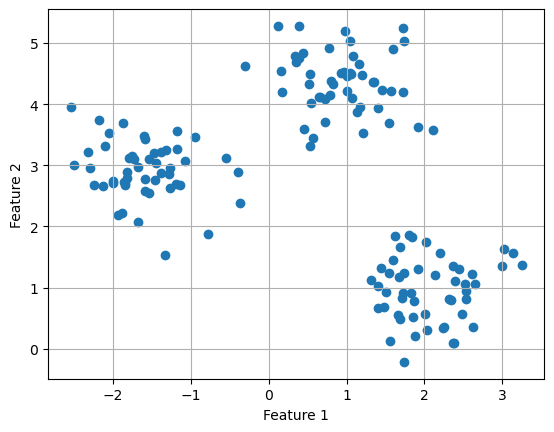

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
# plt.savefig('images/11_01.png', dpi=300)
plt.show()

##### K-menas clustering

**[최적화]**
* 제곱 오차합(Sum of Squared Error, SSE) 최소화
    - 오차를 어떻게 정의할 것인가? 유클리드 거리(Euclidian distance): $\|x-y\|_2$
    - $k$는 군집 수, $n$은 샘플 수

$$
SSE = \sum_{j=1}^k \sum_{i=1}^n w^{(i,j)} \|x^{(i)}-\mu^{(j)}\|_2^2
$$
where $\|x-y\|_2^2=\sum_{l=1}^m (x_l-y_l)^2$ and $w^{(i,j)}=1$ if $x^{(i)} \in j, 0$ otherwise.
* SSE를 관성(inertia)라고도 함

**[알고리즘]**
1. 샘플 포인트에서 랜덤하게 k개의 센트로이드(평균)를 초기 클러스터 중심으로 선택
2. 각 샘플을 가장 가까운 센트로이드 $\mu^{(j)}, j\in\{1,...,k\}$에 할당
3. 할당된 샘플들을 중심으로 센트로이드를 이동
4. 클러스터 할당이 변하지 않거나 사용자가 지정한 허용 오차나 최대 반복 횟수에 도달할 때 까지 2,3을 반복

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='random',
            n_init=10, # 초기화 반복 횟수
            max_iter=300, # 최대 반복 횟수
            tol=1e-04, # 허용 오차 (tolerance)
            random_state=0)


km.fit(X)
y_km = km.predict(X)
# OR YOU CAN USE
# y_km = km.fit_predict(X)


c:\Users\USER\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2])

In [7]:
print(y_km)

[2 1 1 1 2 1 1 2 0 1 2 0 0 1 1 0 0 2 0 2 1 2 1 1 0 2 2 1 0 2 0 0 0 0 1 2 2
 2 1 1 0 0 1 2 2 2 0 1 0 1 2 1 1 2 2 0 1 2 0 1 0 0 0 0 1 0 1 2 1 1 1 2 2 1
 2 1 1 0 0 1 2 2 1 1 2 2 2 0 0 2 2 1 2 1 2 1 0 0 2 2 2 2 0 2 2 1 0 1 1 1 0
 1 2 0 1 0 1 1 0 0 1 2 1 1 2 2 0 2 0 0 0 0 2 0 0 0 1 0 2 0 1 1 2 2 0 0 0 0
 2 2]


In [8]:
centroids = km.cluster_centers_
print(centroids)

[[-1.5947298   2.92236966]
 [ 0.9329651   4.35420712]
 [ 2.06521743  0.96137409]]


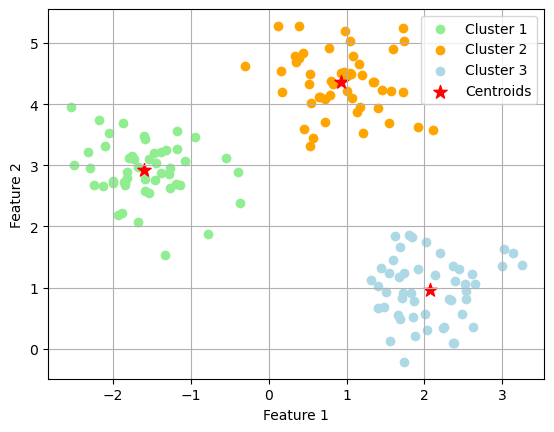

In [11]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            c='lightgreen',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            c='orange',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            c='lightblue',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=100, marker='*',
            c='red',
            label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
# plt.tight_layout()
# plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### K-means 개선
1. 초기 클러스터 센트로이드 할당
    - K-means++: 초기 클러스터 센트로이드가 서로 멀리 떨어지도록 위치 (scikit learn 기본)
2. 최적의 클러스터 개수 찾기
    - 엘보우 방법
    - 실루엣 그래프

##### 1) 엘보우 방법
* k를 증가시키면서 관성이 급격히 꺾이는 포인트(엘보우)를 선택

In [ ]:
print(f'관성: {km.inertia_:.2f}')

왜곡: 72.48


c:\Users\USER\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

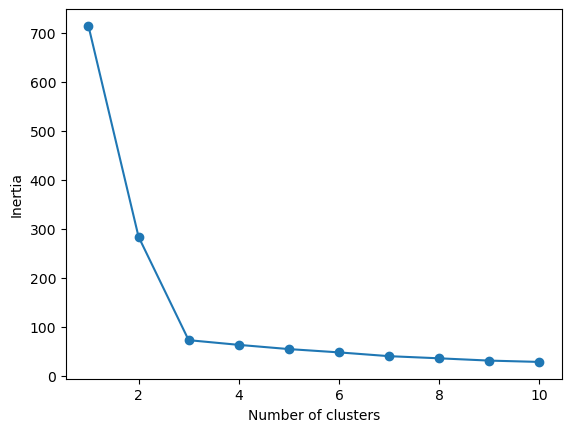

In [13]:
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
# plt.savefig('images/11_03.png', dpi=300)
plt.show()

##### 2) 실루엣 그래프
* 군집 내 샘플들이 얼마나 조밀하게 모여 있는지를 측정하는 그래프 도구
* 실루엣 계수(silhouette coefficient), $s^{(i)}$
    - 클러스터 응집력(cluster cohesion), $a^{(i)}$: 샘플 $x^{(i)}$와 동일한 클러스터 내 모든 다른 포인트들과의 거리의 평균
    - 클러스터 분리도(cluster separation), $b^{(i)}$: 샘플 $x^{(i)}$가 속하지 않은 클러스터 중 샘플 $x^{(i)}$와 가장 가까운 클러스터의 모든 샘플과의 평균 거리
$$
s^{(i)}=\frac{b^{(i)}-a^{(i)}}{\max\{b^{(i)},a^{(i)}\}}
$$

* 실루엣 계수의 값이 평균 실루엣 점수로부터 비슷하게 멀리 떨어져 있을 때

관련코드는 아래 부록으로!

##### 붓꽃 데이터 실습

In [17]:
from sklearn import datasets
import numpy as np

# 붓꽃 데이터 로드
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # 꽃잎 길이, 꽃잎 너비
y = iris.target

In [ ]:
# 엘보우 방법을 이용해 최적의 k 찾기
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
# plt.savefig('images/11_03.png', dpi=300)
plt.show()

In [21]:
# 최적의 k로 K-means 군집화 수행
km = KMeans(n_clusters=3,
            n_init=10,
            max_iter=300,
            random_state=0)
km.fit(X)
y_km = km.predict(X)

c:\Users\USER\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-means clustering (k=3)')

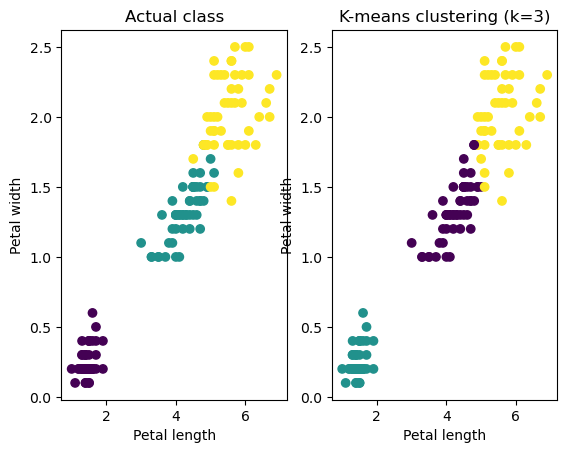

In [22]:
# 실제 클래스와 비교
fig, axes = plt.subplots(1, 2)

axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[0].set_title('Actual class')

axes[1].scatter(X[:, 0], X[:, 1], c=y_km)
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[1].set_title('K-means clustering (k=3)')


##### 부록: 실루엣 그래프 코드

In [26]:
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

In [27]:
import numpy as np
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3,
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)  # [0, 1, 2]
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')


c:\Users\USER\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


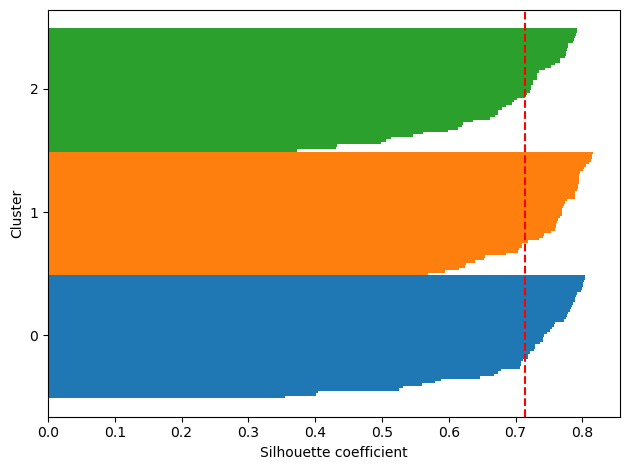

In [28]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for c in cluster_labels:
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none')

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('images/11_04.png', dpi=300)
plt.show()